#TASKS LIST

1. Basic Information Data
2. Create a Word Cloud depicting Trends.
3. Visualize on Trending Hashtags & Handles
4. Sentimental Analysis (By Person, By Date)

In [24]:
# Libraries Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import operator
import itertools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
# Twitter Covid19 Dataset
df = pd.read_csv("Tweeter_Data_IN.csv")

# Function & Pre-Processing Data

## Functions
1. To Calculate Popularity of Tweet
2. To Calculate Popularity of Handle (On basis of Tweets)
3. To Join List of String to Single String
4. To Create a Histogram of Words
5. To Mask Image for Images with Black Background
6. To Remove 'NaN' values from string
7. To Classify Sentiments of Users :-
  *   Extremely Positive
  *   Positive
  *   Neutral
  *   Negative
  *   Extremely Negative


## Pre-Processing
1. Addition of Popularity Column
2. No.of Tweets by Every User in Database
3. Parsing Out Dates from Database
3. Dropping Off the Unrequired Columns

In [26]:
# Function -> To Calculate Popularity of Tweet
df['popularity'] = 0.4*df['favorite_count'] + 0.4*df['retweet_count'] + 0.2*df['user_followers_count']

# Function -> To Calculate Popularity of Handle (On basis of Tweets)
def f(x):
   b =  x['popularity'].sum()
   return pd.Series([b], index=['popularity'])

# Pre-Processing -> Addition of Popularity Column
temp_df = df.groupby(['user_screen_name']).apply(f)
temp_df['no. of tweets'] = df_count
temp_df['popularity per tweet'] = temp_df['popularity'] / temp_df['no. of tweets']

# Function -> To Join List of String to Single String
def listToString(s):  
    str1 = ""  
    for ele in s:  str1 += str(ele) + " "   
    return str1

# Function -> To Create a Histogram of Words
def make_frequency_list(wordlist):
    freq = dict()
    for word in wordlist:
        if word in freq.keys(): freq[word] += 1
        else: freq[word] = 1
    return freq

# Function -> To Mask Image for Images with Black Background
def transform_format(val):
    if val == 0: return 255
    else: return val

# Function -> To Remove 'NaN' values from string
def remove_items(test_list): 
    res = [i for i in test_list if i != 'nan'] 
    return res

#Function -> To Classify Sentiments of Users
sia = SentimentIntensityAnalyzer()
# Extremely Positive  ->   1   >= sentiment >  0.75
# Positive            ->  0.75 >= sentiment >  0.25
# Neutral             ->  0.25 >= sentiment > -0.25
# Negative            -> -0.25 >= sentiment > -0.75
# Extremely Negative  -> -0.75 >= sentiment > -1
def sentiment(tw):
  sent = sia.polarity_scores(tw)
  compound = sent['compound']
  if(compound>0.75): sentimentc = 2
  if(compound<=0.75 and compound>0.25): sentimentc = 1
  if(compound<=0.25 and compound>-0.25): sentimentc = 0
  if(compound<=-0.25 and compound>-0.75): sentimentc = -1
  if(compound<=-0.75): sentimentc = -2
  return sentimentc

# Pre-Processing -> Parsing out Dates from the dataset
dates = []
for created in df['created_at']:
  spt = created.split()
  date = spt[1] + " " + spt[2] + " " + spt[-1]
  dates.append(date)
df['date'] = dates

# Pre-Processing -> Dropping Off the Unrequired Columns
df = df.drop(columns=['created_at', 'id', 'lang', 'tweet_url', 'user_description', 'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1', 'user_favourites_count', 'user_friends_count'])

# Pre-Processing -> No.of Tweets by Every User in Database
df_count = df['user_screen_name'].value_counts()

df.head()

,hashtags,favorite_count,place,retweet_count,text,user_screen_name,user_followers_count,user_statuses_count,popularity,date
0,NaN,0,"Pune, India",0,Meditation and mindfulness tips for coping wit...,ShalomFloat,382,1770,76.4,Mar 25 2020
1,NaN,0,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,prakashkalal,175,73,35.0,Mar 25 2020
2,NaN,0,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,Bhartendulkar,609,6002,121.8,Mar 25 2020
3,SSC_UFM_MAT_KARONA Corona UFM,9,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,patilkiii,259,1387,63.0,Mar 25 2020
4,Corona pritamkumarmurari Voice,0,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,SINGERMurariPa1,2,13,0.4,Mar 25 2020


## Details About Dataset Columns

1. hashtags - Twitter Hashtags Used in Text
2. favorite_count - No. of times Tweet has been liked
3. place - Location of the Twitter User
4. text - Text Tweeted by the User
5. user_screen_name - Unique User Handle Name
6. user_followers_count - User's Followers
7. user_statuses_count - Total Tweets done by User till Date
8. popularity - User's Tweet Popularity
9. date - Date on which Tweet was Posted

#TASKS LIST

##1. Basic Information Data
2. Create a Word Cloud depicting Trends.
3. Visualize on Trending Hashtags & Handles
4. Sentimental Analysis (By Person, By Date)

In [28]:
# Dimensions of the database
# Total tweets in database
print("No. of rows in the given Dataset    :  ", df.shape[0])
print("No. of columns in the given Dataset :  ", df.shape[1])

No. of rows in the given Dataset    :   44179
No. of columns in the given Dataset :   10


In [32]:
# Unique Twitter Handles in dataset
unique_names = df['user_screen_name'].unique()
print("No. of Unique Users in the given Dataset  :  ", unique_names.size)

# Unique Dates in Dataset
unique_dates = df['date'].unique()
print("No. of Unique Dates in the given Dataset  :  ", unique_dates.size)

# Unique Places in Dataset
unique_places = df['place'].unique()
print("No. of Unique Places in the given Dataset :  ", unique_places.size)

No. of Unique Users in the given Dataset  :   22447
No. of Unique Dates in the given Dataset  :   24
No. of Unique Places in the given Dataset :   2579


In [36]:
# Most popular tweet
print("Most Popular tweet               : ", df['text'][np.array(df['popularity']).argmax()][:100], "...")
print("Popularity                       : ", np.array(df['popularity']).max())

# Most retweeted tweet
print("\nMost Retweeted tweet             : ", df['text'][np.array(df['retweet_count']).argmax()][:100], "...")
print("No. of times Retweeted           : ", np.array(df['retweet_count']).max())

# Most liked tweet
print("\nMost Liked tweet                 : ", df['text'][np.array(df['favorite_count']).argmax()][:100], "...")
print("No. of times Liked               : ", np.array(df['favorite_count']).max())

# User with most followers
print("\nUser with most Followers         : ", df['user_screen_name'][np.array(df['user_followers_count']).argmax()])
print("No. of Followers                 : ", np.array(df['user_followers_count']).max())

# User with most tweets till date
print("\nUser with most Tweets            : ", df['user_screen_name'][np.array(df['user_statuses_count']).argmax()])
print("No. of Tweets Made               : ", np.array(df['user_statuses_count']).max())

# Most popular tweeter (OVERALL)
print("\nMost Popular Tweeter (OVERALL)   : ", temp_df.index[np.array(temp_df['popularity']).argmax()])
print("Popularity                       : ", np.array(temp_df['popularity']).max())

# Most popular tweeter (PER TWEET)
print("\nMost Popular Tweeter (PER TWEET) : ", temp_df.index[np.array(temp_df['popularity per tweet']).argmax()])
print("Popularity                       : ", np.array(temp_df['popularity per tweet']).max())

Most Popular tweet               :  It‚Äôs time we all do our bit to help defeat #COVID19. I‚Äôm pledging ‚Çπ52 lakh for the fight again ...
Popularity                       :  3722065.6

Most Retweeted tweet             :  It‚Äôs time we all do our bit to help defeat #COVID19. I‚Äôm pledging ‚Çπ52 lakh for the fight again ...
No. of times Retweeted           :  22549

Most Liked tweet                 :  It‚Äôs time we all do our bit to help defeat #COVID19. I‚Äôm pledging ‚Çπ52 lakh for the fight again ...
No. of times Liked               :  144012

User with most Followers         :  ImRaina
No. of Followers                 :  18277206

User with most Tweets            :  propertiesindia
No. of Tweets Made               :  2117851

Most Popular Tweeter (OVERALL)   :  thekiranbedi
Popularity                       :  7406212.0

Most Popular Tweeter (PER TWEET) :  ImRaina
Popularity                       :  3722065.6


#TASKS LIST

1. Basic Information Data
##2. Create a Word Cloud depicting Trends.
3. Visualize on Trending Hashtags & Handles
4. Sentimental Analysis (By Person, By Date)

####IMAGE used depicts a BIRD (Twitter Logo) with CORONA VIRUS,
####HORIZONTAL BARS of TEXT across image depicts LOCKDOWN WORLDWIDE

In [43]:
# Used Function -> To Join List of String to Single String
tweets = listToString(df['text'])
# Splitting String to words for Word Cloud
tweet = tweets.split()

# Mask Image
transformed_mask = np.array(Image.open('corona.png'))

# # Transform your Image (ONLY USE IF CHANGE OF IMAGE GIVES ERROR)
# transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
# for i in range(len(mask)):
# # Used Function -> To Mask Image for Images with Black Background
#     transformed_mask[i] = list(map(transform_format, mask[i]))

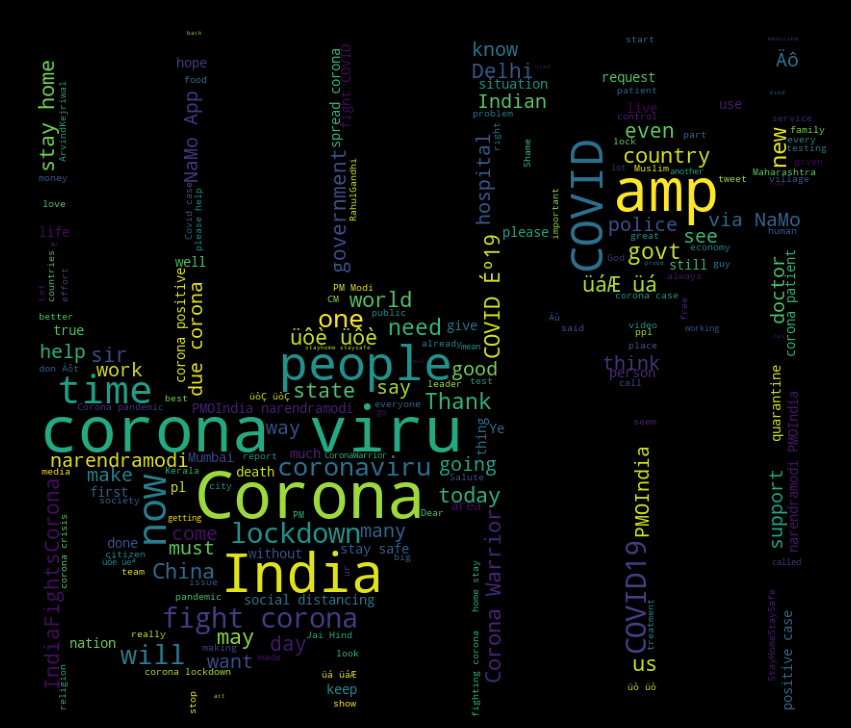

In [69]:
# Creating Word Cloud with Image
def twitter_word_cloud(tweet):
    stopwords = set(STOPWORDS)
    stopwords.update(["https", "co"])
    wordcloud = WordCloud(background_color="black", mask=transformed_mask, stopwords=stopwords, random_state = 2).generate(" ".join([tw for tw in tweet]))
    plt.figure( figsize=(15,15), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Twitter WordCloud")
twitter_word_cloud(tweet)

#TASKS LIST

1. Basic Information Data
2. Create a Word Cloud depicting Trends.
##3. Visualize on Trending Hashtags & Handles
4. Sentimental Analysis (By Person, By Date)

####TOP 10 Trending Hashtags

In [45]:
# Used Function -> To Join List of String to Single String
tags = listToString(df['hashtags'])
tags = tags.split()

# Used Function -> To Remove 'NaN' values from string
hashtags = remove_items(tags)

# Used Function -> To Create a Histogram of Words
hist = make_frequency_list(hashtags)

Text(0.5, 0, 'Top Trending Hashtags')

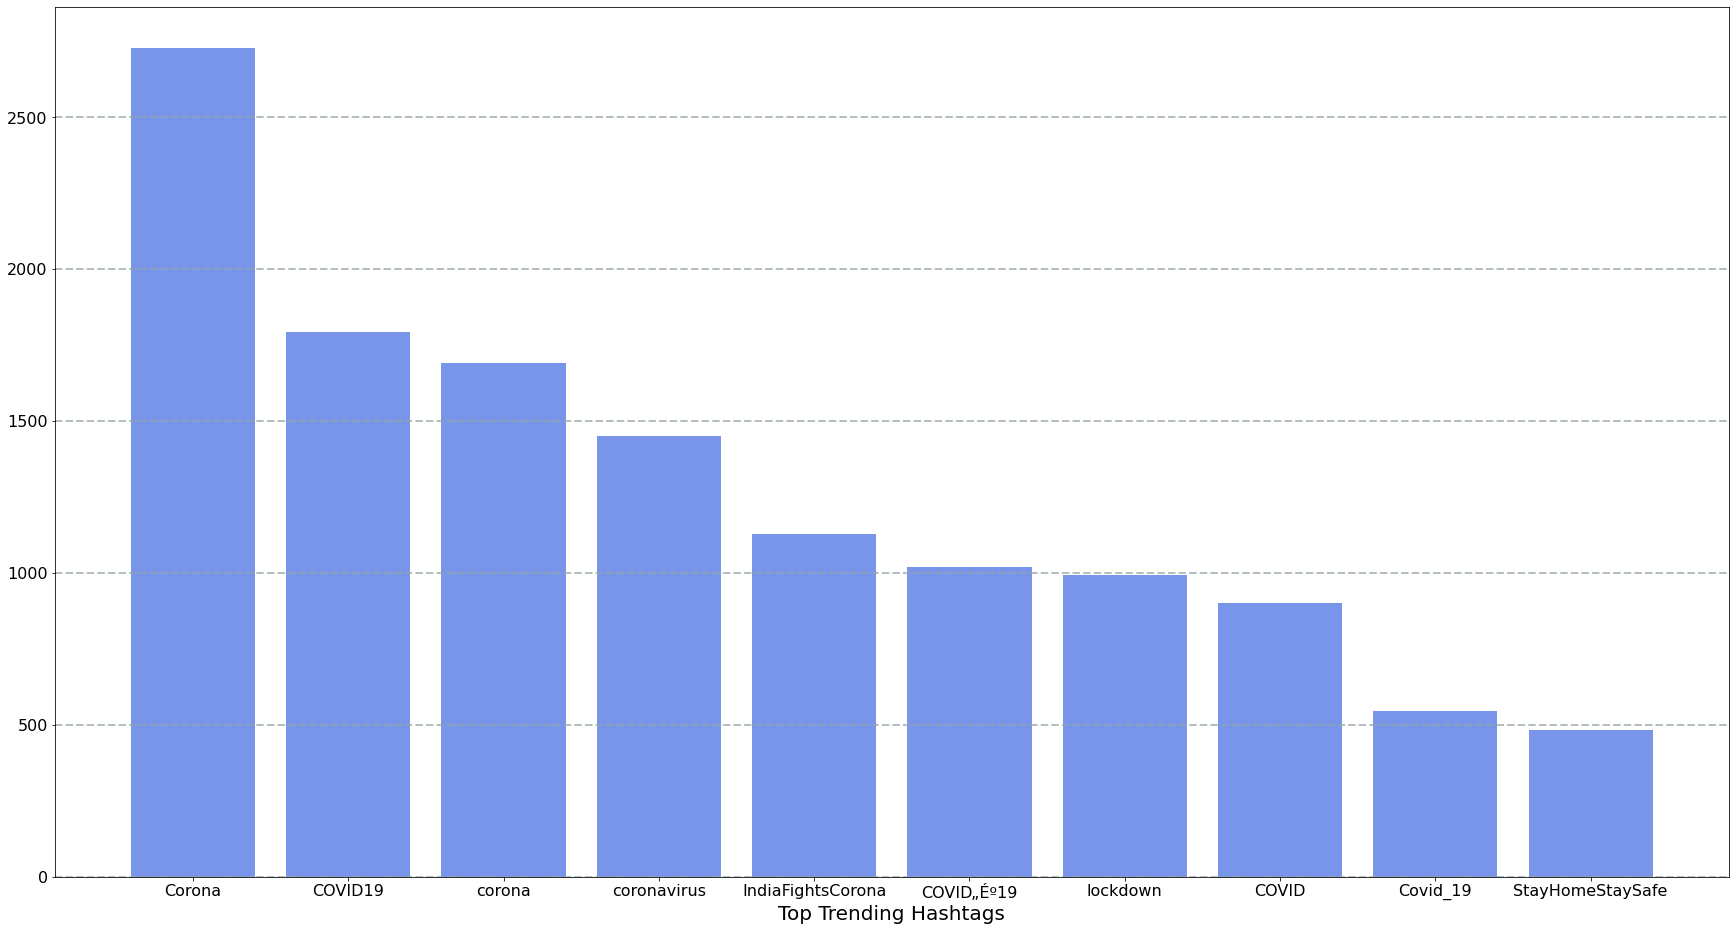

In [70]:
# Top 10 Trending Hashtags on Twitter During Covid19 Crisis
# Sorting the Dictionary to pick top 10 hashtags
sorted_dict = dict( sorted(hist.items(), key=operator.itemgetter(1),reverse=True))
sliced_dict = dict(itertools.islice(sorted_dict.items(), 10))
# Plotting the Graph
plt.figure(figsize=(30,16), dpi = 300)
plt.bar(*zip(*sliced_dict.items()), color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
# Set tick font size
plt.rcParams['font.size'] = '16'
plt.xlabel('Top Trending Hashtags', fontsize=20)

####TOP 10 Twitter Handles with Maximum Tweets (Database Period not Overall)
####TOP 10 Twitter Handles with Maximum Tweets (Overall)
####TOP 10 Twitter Handles with Maximum Popularity (Per Tweet - Database Period)
####TOP 10 Twitter Handles with Maximum Popularity (All Tweets - Database Period)
####TOP 10 Twitter Handles with Maximum Followers

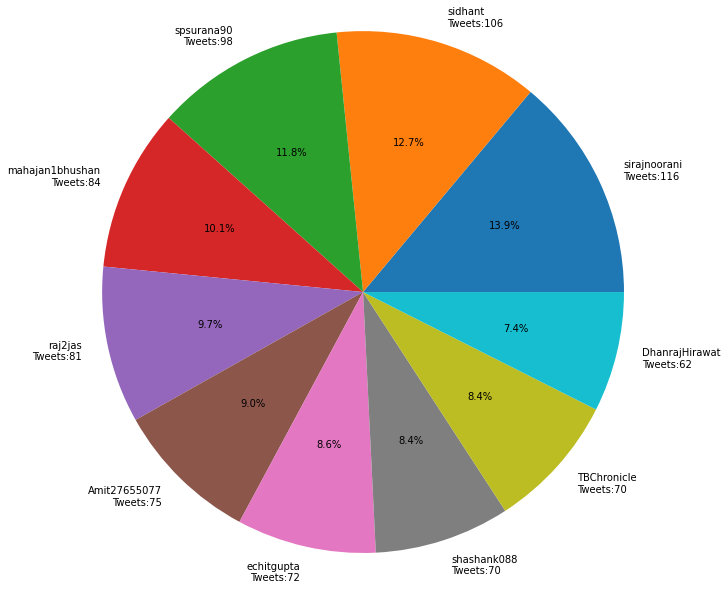

In [47]:
# Top 10 Twitter Handles that Dominated conversation
# Searching dataset for top handles
df_count= df['user_screen_name'].value_counts().head(10)
# Plotting PieChart
def add(a, b):
    return a+'\nTweets:'+str(b)
plt.pie(df_count, autopct='%1.1f%%', radius=3, labels=list(map(add,df_count.index.values, df_count)));
plt.show()

In [49]:
# # Unique Twitter Handles in dataset
# unique_names = df['user_screen_name'].unique()
# unique_names.size

# #Uniques Dates in Dataset
# unique_dates = df['date'].unique()
# unique_dates.size

In [50]:
# Creating Dataset with desired columns
count = range(1)
detail_df = pd.DataFrame(columns=["name", "extremely positive", "positive", "neutral", "negative", "extremely negative"], index=count)
# Analysing the sentiment of user's tweets
l = 0
for name in unique_names:
  i = 0
  expos = 0
  pos = 0
  neu = 0
  neg = 0
  exneg = 0
  for user_name in df['user_screen_name']:
    if name == user_name:
      s = sentiment(df['text'][i])
      if s == 2:
        expos +=1
      elif s == 1:
        pos += 1
      elif s == 0:
        neu += 1
      elif s == -1:
        neg +=1
      else:
        exneg += 1
    i += 1
  detail_df.loc[l] = [name, expos, pos, neu, neg, exneg]
  l += 1
# Displying the number of tweets in particular sentiment
detail_df_sorted = detail_df.sort_values(by=['name'], ignore_index=True)
detail_df_sorted.head()

KeyboardInterrupt: ignored

In [ ]:
#Types of Tweets and their numbers
detail_df_sorted.sum()

In [ ]:
# Output the datset to a file
detail_df_sorted.to_csv('sentiment_analysis_user_wise.csv',index=False)

In [ ]:
#Parsing out Dates from the dataset
dates = []
for created in df['created_at']:
  spt = created.split()
  date = spt[1] + " " + spt[2] + " " + spt[-1]
  # df['date'][c] = date
  dates.append(date)
  # c += 1

df['date'] = dates
df[['created_at', 'date']].head()

In [ ]:
# Creating Dataset with desired columns
count = range(1)
date_df = pd.DataFrame(columns=["date", "extremely positive", "positive", "neutral", "negative", "extremely negative"], index=count)
#Classifying the sentiment on basis of Dates
l = 0
for date in unique_dates:
  i = 0
  expos = 0
  pos = 0
  neu = 0
  neg = 0
  exneg = 0
  for df_date in df['date']:
    if date == df_date:
      # print(df['text'][i], " - ", name)
      s = sentiment(df['text'][i])
      if s == 2:
        expos +=1
      elif s == 1:
        pos += 1
      elif s == 0:
        neu += 1
      elif s == -1:
        neg +=1
      else:
        exneg += 1
    i += 1
  date_df.loc[l] = [date, expos, pos, neu, neg, exneg]
  l += 1

date_df.head()

In [ ]:
#Types of sentiments on basis of dates
date_df.sum()

In [ ]:
# Output the datset to a file
date_df.to_csv('sentiment_analysis_date_wise.csv',index=False)

In [ ]:
# Variation in Tweets Plot
plt.figure(figsize=(32, 10))
plt.plot(date_df['date'], date_df['extremely positive'], label="extremely positive")
plt.plot(date_df['date'], date_df['positive'], label="positive")
plt.plot(date_df['date'], date_df['neutral'], label="neutral")
plt.plot(date_df['date'], date_df['negative'], label="negative")
plt.plot(date_df['date'], date_df['extremely negative'], label="extremely negative")
plt.legend()
plt.xlabel("Dates", fontsize=15)
plt.ylabel("No. of Tweets", fontsize=15)
plt.title("Variation of Tweets with date", fontsize=20)
plt.show()

In [ ]:
count = range(1)
detail_df = pd.DataFrame({"date": date_df['date'], "extremely positive": date_df["extremely positive"].astype(float) * 5, "positive": date_df["positive"].astype(float) * 5, "neutral": date_df["neutral"].astype(float) * 5, "negative": date_df["negative"].astype(float) * 5, "extremely negative": date_df["extremely negative"].astype(float) * 5})
detail_df.head()

In [ ]:
plt.figure(figsize=(32, 10))
plt.scatter('date', 'extremely positive', s='extremely positive', alpha=0.7, data=detail_df)
plt.scatter('date', 'positive', s='positive', alpha=0.7, data=detail_df)
plt.scatter('date', 'neutral', s='neutral', alpha=0.7, data=detail_df)
plt.scatter('date', 'negative', s='negative', alpha=0.7, data=detail_df)
plt.scatter('date', 'extremely negative', s='extremely negative', alpha=0.7, data=detail_df)
plt.legend(fontsize=18)
plt.xlabel("Dates", fontsize=15)
plt.ylabel("No. of Tweets", fontsize=15)
plt.title("Variation of Tweets with date", fontsize=20)
plt.show()